In [33]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
class_df = pd.read_csv("../sheener/SYDE 1A Class Profile Questions.csv")
class_df.head(10)

# Get average difficulty per course

In [35]:
filter_difficulty = [col for col in class_df.columns if col.startswith("How difficult")]
print(filter_difficulty)

['How difficult did you find each 1A course to be? [101L]', 'How difficult did you find each 1A course to be? [101]', 'How difficult did you find each 1A course to be? [111]', 'How difficult did you find each 1A course to be? [113]', 'How difficult did you find each 1A course to be? [121]', 'How difficult did you find each 1A course to be? [161]', 'How difficult did you find each 1A course to be? [181]']


In [36]:
filter_usefulness = [col for col in class_df.columns if col.startswith("How useful did")]
print(filter_usefulness)

['How useful did you find each of the 1A courses to be? [101L]', 'How useful did you find each of the 1A courses to be? [101]', 'How useful did you find each of the 1A courses to be? [111]', 'How useful did you find each of the 1A courses to be? [113]', 'How useful did you find each of the 1A courses to be? [121]', 'How useful did you find each of the 1A courses to be? [161]', 'How useful did you find each of the 1A courses to be? [181]']


In [37]:
class_df['Roughly what percentage of lectures did you watch for each course?? [111]'].unique()

array(['100%', '50%', '25%', '75%', '0%', nan], dtype=object)

In [38]:
difficulty = {
    "How difficult did you find each 1A course to be? [101L]": "101L",
    "How difficult did you find each 1A course to be? [101]": "101",
    "How difficult did you find each 1A course to be? [111]": "111",
    "How difficult did you find each 1A course to be? [113]": "113",
    "How difficult did you find each 1A course to be? [121]": "121",
    "How difficult did you find each 1A course to be? [161]": "161",
    "How difficult did you find each 1A course to be? [181]": "181",
}

In [39]:
times = {'Roughly what percentage of lectures did you watch for each course?? [101L]': '101L',
       'Roughly what percentage of lectures did you watch for each course?? [101]': '101',
       'Roughly what percentage of lectures did you watch for each course?? [111]': '111',
       'Roughly what percentage of lectures did you watch for each course?? [113]': '113',
       'Roughly what percentage of lectures did you watch for each course?? [121]': '121',
       'Roughly what percentage of lectures did you watch for each course?? [161]': '161',
       'Roughly what percentage of lectures did you watch for each course?? [181]': '181'}

In [40]:
filter_all = filter_difficulty + filter_usefulness
useful_difficult_df = class_df[filter_all]

In [ ]:
combined_df = useful_difficult_df.replace({"Easy": -2, "Very Useful": 2, "Somewhat Easy": -1, "Somewhat Useful": 1, 
                                       "Neutral": 0, "Somewhat Difficult": 1, "Somewhat Useless": -1, 
                                       "Useless": -2, "Very Difficult": 2})
                                       
nums_df = class_df[difficulty.keys()].replace({"Easy": -2, "Somewhat Easy": -1,  
                                       "Neutral": 0, "Somewhat Difficult": 1,"Very Difficult": 2}).rename(columns=difficulty) 
time_df = class_df[times.keys()].replace({"100%": 100, "75%": 75,  
                                       "50%": 50, "25%": 25,"0%":0}).rename(columns=times)    
time_df

In [42]:
#get average grades
grades_columns = [ 'What was your final grade for 101L?',\
                'What was your final grade for 101?',\
       'What was your final grade for 111? ',\
       'What was your final grade for 113?',\
       'What was your final grade for 121?',\
       'What was your final grade for 161?',\
       'What was your final grade for 181?']

In [43]:
def stack_cols(df,cols_to_stack):
    stacked_cols = []
    for col in cols_to_stack:
        stacked_cols += df[col].tolist()
    

    return stacked_cols



In [44]:
#create new df with stacked cols
stacked_df = pd.DataFrame()
stacked_df["difficulties"] = stack_cols(combined_df,filter_difficulty)
stacked_df["lectures_attended"] = stack_cols(time_df,list(times.values()))
stacked_df["usefulness"] = stack_cols(combined_df,filter_usefulness)
stacked_df["grades"] = stack_cols(class_df,grades_columns)
stacked_df.dropna(inplace=True)

In [45]:
#pearsons
stacked_df.corr()

,difficulties,lectures_attended,usefulness,grades
difficulties,1.000000,0.208848,0.307916,-0.328524
lectures_attended,0.208848,1.000000,0.291136,-0.055109
usefulness,0.307916,0.291136,1.000000,-0.021831
grades,-0.328524,-0.055109,-0.021831,1.000000


In [46]:
#spearman
stacked_df.corr(method = "spearman")

,difficulties,lectures_attended,usefulness,grades
difficulties,1.000000,0.196960,0.271641,-0.317978
lectures_attended,0.196960,1.000000,0.249319,0.006471
usefulness,0.271641,0.249319,1.000000,0.013395
grades,-0.317978,0.006471,0.013395,1.000000


In [47]:
averaged_nums = nums_df.apply(lambda col: col.mean(), axis="rows")
print(averaged_nums)

101L   -0.340426
101    -1.574468
111     1.106383
113     0.680851
121    -0.180851
161    -0.191489
181    -0.063830
dtype: float64


In [48]:
averaged_times = time_df.apply(lambda col: col.mean(), axis="rows")
averaged_times

101L    60.106383
101     51.329787
111     79.255319
113     72.282609
121     66.223404
161     45.212766
181     80.585106
dtype: float64

# Get average grade per course

In [ ]:
grades_df = class_df[grades_columns]
grades_df = grades_df.dropna()
grades_df

In [50]:
mean_val = lambda col : col.mean()

mean_grades = grades_df.apply(mean_val, axis=0)

In [51]:
mean_grades.index = [(course.split()[-1][:-1]) for course in mean_grades.index ]
mean_grades

101L    90.274725
101     91.527473
111     85.164835
113     87.736264
121     92.098901
161     86.340659
181     86.208791
dtype: float64

In [ ]:
print(mean_grades.values)
nums_df.values

             Average  Difficulty
Average     1.000000   -0.681201
Difficulty -0.681201    1.000000


<ipython-input-53-04e37d58d0b1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])


[(65.0, 100.0), (-2.0, 2.0)]

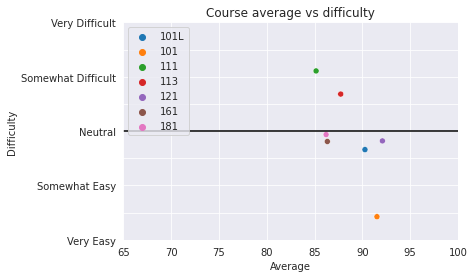

In [53]:
# change background style
sns.set_style("darkgrid")
graph1 = pd.DataFrame(index = pd.Index(["101L","101","111","113","121","161","181"],name = "Course"))
graph1["Average"] = mean_grades.values
graph1["Difficulty"] = averaged_nums.values
print(graph1.corr())
# plot data
ax = sns.scatterplot(x=mean_grades.values, y=averaged_nums.values, hue = ["101L","101","111","113","121","161","181"])
ax.set_title("Course average vs difficulty")
ax.set_xlabel("Average")
ax.set_ylabel("Difficulty")

ax.set_yticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])

# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
plt.legend(loc='upper left')
ax.set(xlim=(65 , 100), ylim=(-2,2))
# label each point
# for line in range(0,averaged_nums_df.shape[0]):
#      ax.text(averaged_nums_df.usefulness[line], averaged_nums_df.difficulty[line], averaged_nums_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

In [54]:
averaged_nums

101L   -0.340426
101    -1.574468
111     1.106383
113     0.680851
121    -0.180851
161    -0.191489
181    -0.063830
dtype: float64

In [55]:
mean_grades

101L    90.274725
101     91.527473
111     85.164835
113     87.736264
121     92.098901
161     86.340659
181     86.208791
dtype: float64

           Average  Lectures
Average   1.000000 -0.403492
Lectures -0.403492  1.000000


[(75.0, 100.0), (40.0, 100.0)]

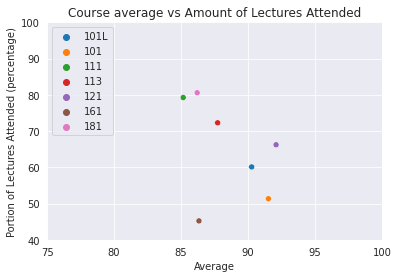

In [56]:
# change background style
sns.set_style("darkgrid")
graph2 = pd.DataFrame(index = pd.Index(["101L","101","111","113","121","161","181"],name = "Course"))
graph2["Average"] = mean_grades.values
graph2["Lectures"] = averaged_times.values
print(graph2.corr())
# plot data
ax = sns.scatterplot(x=mean_grades.values, y=averaged_times.values, hue = ["101L","101","111","113","121","161","181"])
ax.set_title("Course average vs Amount of Lectures Attended")
ax.set_xlabel("Average")
ax.set_ylabel("Portion of Lectures Attended (percentage)")


# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
plt.legend(loc='upper left')
ax.set(xlim=(75 , 100), ylim=(40,100))
# label each point
# for line in range(0,averaged_nums_df.shape[0]):
#      ax.text(averaged_nums_df.usefulness[line], averaged_nums_df.difficulty[line], averaged_nums_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

            Lectures  Difficulty
Lectures    1.000000    0.674259
Difficulty  0.674259    1.000000


<ipython-input-57-d8902c992390>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])


[(-2.0, 2.0), (30.0, 100.0)]

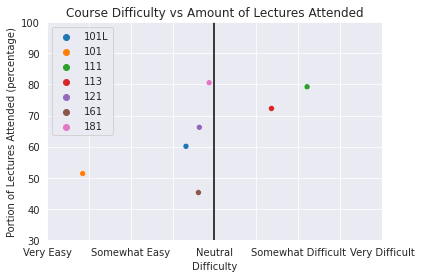

In [57]:
# change background style
sns.set_style("darkgrid")
graph3 = pd.DataFrame(index = pd.Index(["101L","101","111","113","121","161","181"],name = "Course"))
graph3["Lectures"] = averaged_times.values
graph3["Difficulty"] = averaged_nums.values
print(graph3.corr())
# plot data
ax = sns.scatterplot(x=averaged_nums.values, y=averaged_times.values, hue = ["101L","101","111","113","121","161","181"])
ax.set_title("Course Difficulty vs Amount of Lectures Attended")
ax.set_xlabel("Difficulty")
ax.set_ylabel("Portion of Lectures Attended (percentage)")

ax.set_xticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])
# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
plt.legend(loc='upper left')
ax.set(xlim=(-2 , 2), ylim=(30,100))

<ipython-input-58-e31fb7fa2497>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_yticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])


[(-2.0, 2.0)]

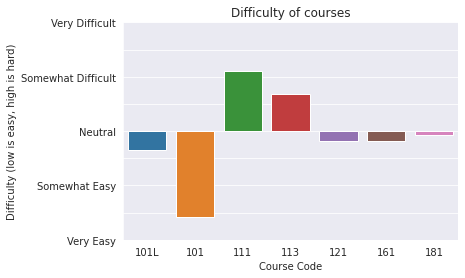

In [58]:
plt = sns.barplot(y = averaged_nums, x = ["101L","101","111","113","121","161","181"])
plt.set_title("Difficulty of courses")
plt.set_xlabel("Course Code")
plt.set_ylabel("Difficulty (low is easy, high is hard)")
plt.set_yticklabels(["Very Difficult","","Somewhat Difficult","","Neutral","","Somewhat Easy","","Very Easy"][::-1])
plt.set(ylim = (-2,2))